<a href="https://colab.research.google.com/github/Maneesh16/Image_Classification_CNN/blob/master/Image_classification_CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [0]:
import os
os.chdir('drive/My Drive/projects')

In [0]:
import numpy as np
import pandas as pd
import cv2
from PIL import Image
import matplotlib.pyplot as plt

# Uploading required csv file

In [0]:
df=pd.read_csv('hackathon_images_train.csv')

In [5]:
df.shape

(1671, 10001)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1671 entries, 0 to 1670
Columns: 10001 entries, Labels to pixels9999
dtypes: float64(10000), object(1)
memory usage: 127.5+ MB


In [7]:
df.head()

,Labels,pixels0,pixels1,pixels2,pixels3,pixels4,pixels5,pixels6,pixels7,pixels8,pixels9,pixels10,pixels11,pixels12,pixels13,pixels14,pixels15,pixels16,pixels17,pixels18,pixels19,pixels20,pixels21,pixels22,pixels23,pixels24,pixels25,pixels26,pixels27,pixels28,pixels29,pixels30,pixels31,pixels32,pixels33,pixels34,pixels35,pixels36,pixels37,pixels38,...,pixels9960,pixels9961,pixels9962,pixels9963,pixels9964,pixels9965,pixels9966,pixels9967,pixels9968,pixels9969,pixels9970,pixels9971,pixels9972,pixels9973,pixels9974,pixels9975,pixels9976,pixels9977,pixels9978,pixels9979,pixels9980,pixels9981,pixels9982,pixels9983,pixels9984,pixels9985,pixels9986,pixels9987,pixels9988,pixels9989,pixels9990,pixels9991,pixels9992,pixels9993,pixels9994,pixels9995,pixels9996,pixels9997,pixels9998,pixels9999
0,Faces_easy,84.0,83.0,82.0,80.0,77.0,76.0,71.0,71.0,72.0,73.0,73.0,65.0,65.0,62.0,63.0,68.0,65.0,65.0,72.0,77.0,86.0,85.0,88.0,84.0,87.0,82.0,79.0,62.0,80.0,80.0,83.0,84.0,82.0,87.0,91.0,87.0,85.0,85.0,89.0,...,189.0,185.0,193.0,194.0,195.0,197.0,194.0,190.0,188.0,185.0,184.0,186.0,186.0,185.0,187.0,188.0,184.0,187.0,183.0,184.0,188.0,192.0,193.0,202.0,206.0,207.0,203.0,228.0,226.0,226.0,225.0,213.0,221.0,220.0,219.0,221.0,222.0,222.0,222.0,223.0
1,airplanes,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,254.0,198.0,197.0,197.0,195.0,195.0,195.0,195.0,196.0,196.0,195.0,195.0,195.0,195.0,195.0,196.0,196.0,195.0,194.0,195.0,195.0,195.0,196.0,197.0,196.0,195.0,197.0,198.0,198.0,...,179.0,174.0,192.0,154.0,171.0,200.0,186.0,194.0,206.0,209.0,211.0,168.0,181.0,205.0,186.0,200.0,175.0,175.0,171.0,204.0,208.0,179.0,179.0,180.0,189.0,163.0,173.0,196.0,190.0,178.0,179.0,254.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0
2,Motorbikes,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,...,15.0,16.0,19.0,17.0,16.0,16.0,18.0,12.0,25.0,20.0,17.0,20.0,18.0,16.0,51.0,28.0,23.0,12.0,16.0,57.0,22.0,16.0,10.0,17.0,20.0,25.0,26.0,223.0,254.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0
3,Leopards,2.0,0.0,2.0,1.0,0.0,2.0,1.0,0.0,2.0,2.0,2.0,2.0,2.0,1.0,1.0,0.0,0.0,1.0,0.0,2.0,3.0,2.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,2.0,0.0,0.0,2.0,6.0,2.0,3.0,0.0,2.0,2.0,...,18.0,24.0,24.0,19.0,24.0,15.0,20.0,16.0,22.0,16.0,25.0,18.0,20.0,25.0,26.0,21.0,22.0,20.0,23.0,18.0,20.0,21.0,17.0,22.0,16.0,22.0,12.0,14.0,19.0,18.0,17.0,18.0,13.0,17.0,19.0,14.0,20.0,11.0,2.0,5.0
4,Faces,125.0,123.0,123.0,120.0,120.0,116.0,114.0,114.0,115.0,99.0,63.0,183.0,185.0,188.0,191.0,197.0,199.0,193.0,195.0,203.0,202.0,205.0,208.0,210.0,209.0,209.0,210.0,217.0,217.0,218.0,217.0,220.0,221.0,219.0,214.0,213.0,209.0,218.0,223.0,...,193.0,190.0,192.0,195.0,185.0,189.0,187.0,171.0,187.0,187.0,196.0,187.0,186.0,173.0,183.0,183.0,172.0,180.0,181.0,175.0,173.0,172.0,169.0,166.0,164.0,152.0,140.0,135.0,84.0,86.0,104.0,123.0,123.0,102.0,139.0,116.0,100.0,112.0,118.0,139.0


In [0]:
train=df.iloc[:,1:]
labels=df.iloc[:,0] # labels or dependent variable of the data

In [9]:
train.head()

,pixels0,pixels1,pixels2,pixels3,pixels4,pixels5,pixels6,pixels7,pixels8,pixels9,pixels10,pixels11,pixels12,pixels13,pixels14,pixels15,pixels16,pixels17,pixels18,pixels19,pixels20,pixels21,pixels22,pixels23,pixels24,pixels25,pixels26,pixels27,pixels28,pixels29,pixels30,pixels31,pixels32,pixels33,pixels34,pixels35,pixels36,pixels37,pixels38,pixels39,...,pixels9960,pixels9961,pixels9962,pixels9963,pixels9964,pixels9965,pixels9966,pixels9967,pixels9968,pixels9969,pixels9970,pixels9971,pixels9972,pixels9973,pixels9974,pixels9975,pixels9976,pixels9977,pixels9978,pixels9979,pixels9980,pixels9981,pixels9982,pixels9983,pixels9984,pixels9985,pixels9986,pixels9987,pixels9988,pixels9989,pixels9990,pixels9991,pixels9992,pixels9993,pixels9994,pixels9995,pixels9996,pixels9997,pixels9998,pixels9999
0,84.0,83.0,82.0,80.0,77.0,76.0,71.0,71.0,72.0,73.0,73.0,65.0,65.0,62.0,63.0,68.0,65.0,65.0,72.0,77.0,86.0,85.0,88.0,84.0,87.0,82.0,79.0,62.0,80.0,80.0,83.0,84.0,82.0,87.0,91.0,87.0,85.0,85.0,89.0,88.0,...,189.0,185.0,193.0,194.0,195.0,197.0,194.0,190.0,188.0,185.0,184.0,186.0,186.0,185.0,187.0,188.0,184.0,187.0,183.0,184.0,188.0,192.0,193.0,202.0,206.0,207.0,203.0,228.0,226.0,226.0,225.0,213.0,221.0,220.0,219.0,221.0,222.0,222.0,222.0,223.0
1,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,254.0,198.0,197.0,197.0,195.0,195.0,195.0,195.0,196.0,196.0,195.0,195.0,195.0,195.0,195.0,196.0,196.0,195.0,194.0,195.0,195.0,195.0,196.0,197.0,196.0,195.0,197.0,198.0,198.0,196.0,...,179.0,174.0,192.0,154.0,171.0,200.0,186.0,194.0,206.0,209.0,211.0,168.0,181.0,205.0,186.0,200.0,175.0,175.0,171.0,204.0,208.0,179.0,179.0,180.0,189.0,163.0,173.0,196.0,190.0,178.0,179.0,254.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0
2,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,...,15.0,16.0,19.0,17.0,16.0,16.0,18.0,12.0,25.0,20.0,17.0,20.0,18.0,16.0,51.0,28.0,23.0,12.0,16.0,57.0,22.0,16.0,10.0,17.0,20.0,25.0,26.0,223.0,254.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0
3,2.0,0.0,2.0,1.0,0.0,2.0,1.0,0.0,2.0,2.0,2.0,2.0,2.0,1.0,1.0,0.0,0.0,1.0,0.0,2.0,3.0,2.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,2.0,0.0,0.0,2.0,6.0,2.0,3.0,0.0,2.0,2.0,1.0,...,18.0,24.0,24.0,19.0,24.0,15.0,20.0,16.0,22.0,16.0,25.0,18.0,20.0,25.0,26.0,21.0,22.0,20.0,23.0,18.0,20.0,21.0,17.0,22.0,16.0,22.0,12.0,14.0,19.0,18.0,17.0,18.0,13.0,17.0,19.0,14.0,20.0,11.0,2.0,5.0
4,125.0,123.0,123.0,120.0,120.0,116.0,114.0,114.0,115.0,99.0,63.0,183.0,185.0,188.0,191.0,197.0,199.0,193.0,195.0,203.0,202.0,205.0,208.0,210.0,209.0,209.0,210.0,217.0,217.0,218.0,217.0,220.0,221.0,219.0,214.0,213.0,209.0,218.0,223.0,220.0,...,193.0,190.0,192.0,195.0,185.0,189.0,187.0,171.0,187.0,187.0,196.0,187.0,186.0,173.0,183.0,183.0,172.0,180.0,181.0,175.0,173.0,172.0,169.0,166.0,164.0,152.0,140.0,135.0,84.0,86.0,104.0,123.0,123.0,102.0,139.0,116.0,100.0,112.0,118.0,139.0


In [0]:
#train=train.astype('float64') # converting pixels values from string to float

# Plotting some of the images

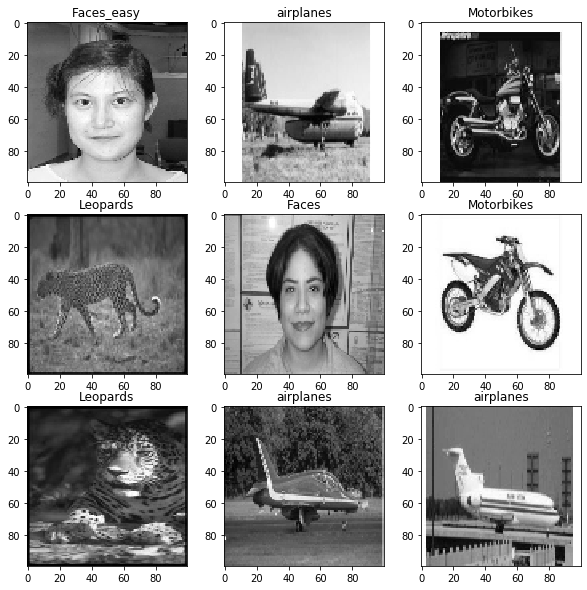

In [11]:
plt.figure(figsize=(10,10))
for num,i in enumerate(range(9)):
  plt.subplot(3,3,num+1)
  plt.imshow(train.iloc[i,:].values.reshape(100,100),cmap='gray')
  plt.title(labels[i])
plt.show()

# Normalizing the data

In [0]:
train_norm=train/255

In [0]:
labels_dum=pd.get_dummies(labels)

In [14]:
labels_dum

,Faces,Faces_easy,Leopards,Motorbikes,airplanes,bonsai,grand_piano,watch
0,0,1,0,0,0,0,0,0
1,0,0,0,0,1,0,0,0
2,0,0,0,1,0,0,0,0
3,0,0,1,0,0,0,0,0
4,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...
1666,0,0,0,1,0,0,0,0
1667,0,0,1,0,0,0,0,0
1668,0,0,0,1,0,0,0,0
1669,0,1,0,0,0,0,0,0


# Splitting the dataset into training and validation

In [0]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(train_norm,labels_dum,test_size=0.2)

# Reshaping the data into 100*100 

In [0]:
xtrain_reshape=x_train.values.reshape(-1,100,100,1)
xtest_reshape=x_test.values.reshape(-1,100,100,1)
train_norm_reshape=train_norm.values.reshape(-1,100,100,1)

# Importing neccessary libraries for building a CNN

In [17]:
%tensorflow_version 1.x
import tensorflow as tf
tf.__version__

'1.15.0'

In [0]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense
#from tensorflow.keras.callbacks import TensorBoard
from tensorflow.keras import regularizers
from tensorflow.keras.layers import Conv2D, MaxPool2D, Dropout, Flatten
from tensorflow.keras.layers import Dropout
#from tensorflow.keras.layers import BatchNormalization
#from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [19]:
# CNN Model
def conv_neural_network():
    model=Sequential()
    # Convolutional layer
    model.add(Conv2D(input_shape=(100,100,1),filters=64,kernel_size=(3,3),strides=(1,1),activation='relu'))
    model.add(Conv2D(filters=64,kernel_size=(3,3),strides=(1,1),activation='relu'))
    model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))
    # Convolutional layer
    model.add(Conv2D(filters=128,kernel_size=(3,3),strides=(1,1),activation='relu'))
    model.add(Conv2D(filters=128,kernel_size=(3,3),strides=(1,1),activation='relu'))
    model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))
    # Convolutional layer
    model.add(Conv2D(filters=256,kernel_size=(3,3),strides=(1,1),activation='relu'))
    model.add(Conv2D(filters=256,kernel_size=(3,3),strides=(1,1),activation='relu'))
    #model.add(Conv2D(filters=256,kernel_size=(3,3),strides=(1,1),activation='relu'))
    model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))
    '''model.add(Conv2D(filters=512,kernel_size=(3,3),strides=(1,1),activation='relu'))
    model.add(Conv2D(filters=512,kernel_size=(3,3),strides=(1,1),activation='relu'))
    #model.add(Conv2D(filters=512,kernel_size=(3,3),strides=(1,1),activation='relu'))
    model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))'''
    # Flatten
    model.add(Flatten())
    # Neural network
    model.add(Dense(units=2048,activation='relu',kernel_regularizer=regularizers.l2(l=0.01)))
    model.add(Dropout(0.2))
    model.add(Dense(units=1024,activation='relu',kernel_regularizer=regularizers.l2(l=0.01)))
    model.add(Dropout(0.2))
    model.add(Dense(units=512,activation='relu',kernel_regularizer=regularizers.l2(l=0.01)))
    model.add(Dropout(0.2)) 
    '''model.add(Dense(units=64,activation='relu',kernel_regularizer=regularizers.l2(l=0.01)))
    model.add(Dropout(0.2))'''
    model.add(Dense(units=8,activation='softmax'))
    model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['acc'])
    return model

# calling baseline model
conv_nn = conv_neural_network()
print(conv_nn.summary())
# initializing tensorboard
#tfb = TensorBoard('foods')

# image generator
#train_datagen = ImageDataGenerator(rotation_range=20,width_shift_range=0.2,height_shift_range=0.2,shear_range=0.2,zoom_range=0.2,horizontal_flip=True)
#validation_datagen=ImageDataGenerator()
#train_datagen.fit(x_train_reshape)
#train_flow=train_datagen.flow(x_train,y_train,batch_size=8)
#validation_flow=validation_datagen.flow(x_test,y_test,batch_size=8)


Instructions for updating:
If using Keras pass *_constraint arguments to layers.
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 98, 98, 64)        640       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 96, 96, 64)        36928     
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 48, 48, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 46, 46, 128)       73856     
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 44, 44, 128)       147584    
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 22, 22, 128)       0         
_________________________________________

In [20]:
# Training Model 
history1 = conv_nn.fit(xtrain_reshape,y_train,batch_size=32,epochs=70,validation_data=[xtest_reshape,y_test])
#history1 = conv_nn.fit(train_norm_reshape,labels_dum,batch_size=32,epochs=30)

Train on 1336 samples, validate on 335 samples
Epoch 1/70
1336/1336 [==============================] - 9s 7ms/sample - loss: 17.6874 - acc: 0.2470 - val_loss: 6.1848 - val_acc: 0.2836
Epoch 2/70
1336/1336 [==============================] - 3s 2ms/sample - loss: 4.4271 - acc: 0.3817 - val_loss: 3.1341 - val_acc: 0.4687
Epoch 3/70
1336/1336 [==============================] - 3s 2ms/sample - loss: 2.6494 - acc: 0.5606 - val_loss: 2.1016 - val_acc: 0.7582
Epoch 4/70
1336/1336 [==============================] - 3s 2ms/sample - loss: 1.8928 - acc: 0.7478 - val_loss: 1.6828 - val_acc: 0.7940
Epoch 5/70
1336/1336 [==============================] - 3s 2ms/sample - loss: 1.4325 - acc: 0.8226 - val_loss: 1.3584 - val_acc: 0.8507
Epoch 6/70
1336/1336 [==============================] - 3s 2ms/sample - loss: 1.1490 - acc: 0.8810 - val_loss: 1.1115 - val_acc: 0.8896
Epoch 7/70
1336/1336 [==============================] - 3s 2ms/sample - loss: 1.0253 - acc: 0.8900 - val_loss: 1.1166 - val_acc: 0.8806


In [21]:
data_loss_nn = pd.DataFrame(history1.history)
data_loss_nn.head(3)

,loss,acc,val_loss,val_acc
0,17.687390,0.247006,6.184796,0.283582
1,4.427072,0.381737,3.134062,0.468657
2,2.649447,0.560629,2.101607,0.758209


# Plotting training loss, validation loss

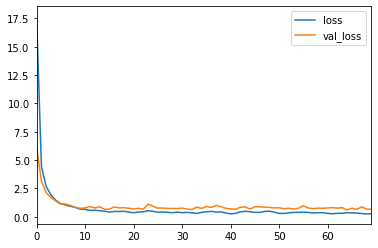

In [22]:
data_loss_nn[['loss','val_loss']].plot(kind='line')

# Plotting training accuracy and validation accuracy

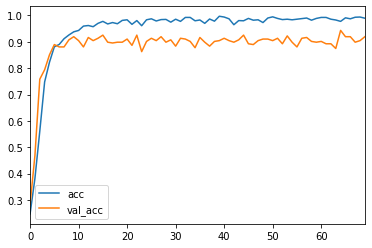

In [23]:
data_loss_nn[['acc','val_acc']].plot(kind='line')

In [0]:
y_pred=conv_nn.predict_classes(xtest_reshape)  # validation data predictions

In [25]:
y_pred

array([3, 0, 3, 4, 3, 0, 3, 3, 0, 3, 3, 1, 3, 3, 1, 3, 1, 1, 4, 4, 2, 0,
       3, 3, 1, 1, 3, 2, 3, 0, 1, 3, 3, 1, 3, 1, 1, 6, 1, 1, 7, 0, 2, 3,
       2, 6, 0, 4, 3, 3, 3, 7, 0, 4, 0, 3, 3, 5, 3, 3, 2, 7, 0, 0, 4, 4,
       1, 3, 4, 2, 1, 4, 7, 3, 1, 1, 3, 7, 3, 4, 4, 1, 1, 3, 3, 3, 3, 3,
       0, 0, 0, 0, 4, 5, 1, 4, 4, 3, 3, 1, 1, 0, 1, 0, 4, 1, 0, 4, 7, 3,
       4, 5, 0, 4, 1, 0, 2, 0, 5, 7, 3, 4, 3, 3, 1, 2, 3, 3, 4, 1, 3, 6,
       7, 2, 1, 0, 7, 4, 0, 1, 7, 3, 1, 1, 7, 3, 4, 6, 4, 4, 7, 3, 1, 1,
       2, 0, 3, 3, 3, 3, 3, 4, 4, 0, 3, 4, 7, 3, 4, 0, 1, 7, 1, 3, 3, 5,
       4, 0, 0, 4, 1, 3, 7, 0, 1, 3, 4, 7, 3, 3, 0, 0, 0, 0, 7, 7, 3, 3,
       4, 3, 4, 0, 3, 0, 3, 3, 0, 1, 4, 1, 2, 4, 3, 1, 7, 1, 2, 1, 0, 4,
       4, 3, 4, 3, 5, 0, 6, 1, 1, 0, 0, 1, 3, 4, 3, 0, 0, 0, 0, 3, 0, 1,
       1, 0, 4, 3, 6, 3, 0, 1, 3, 4, 4, 4, 3, 7, 3, 4, 7, 3, 5, 3, 4, 6,
       2, 3, 7, 2, 3, 3, 1, 3, 0, 3, 4, 3, 5, 3, 4, 7, 0, 3, 0, 3, 0, 4,
       7, 1, 3, 4, 4, 2, 4, 5, 3, 3, 3, 1, 6, 2, 3,

In [0]:
from sklearn.metrics import confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import log_loss

def classification_metric(y_test,y_pred,label):
    # confusion matrix
    cm = confusion_matrix(y_test,y_pred)
    row_sum = cm.sum(axis=0)
    cm = np.append(cm,row_sum.reshape(1,-1),axis=0)
    col_sum = cm.sum(axis=1)
    cm = np.append(cm,col_sum.reshape(-1,1),axis=1)

    labels = label+['Total']
    plt.figure(figsize=(10,6))
    sns.heatmap(cm,annot=True,cmap='PiYG',fmt='0.2f',xticklabels=labels,
                yticklabels=labels,linewidths=3,cbar=None,)

    plt.xlabel('Predicted Values')
    plt.ylabel('Actual Values')
    plt.title('Confusion Matrix')
    plt.show()
    
    print('*'*30+'Classifcation Report'+'*'*30+'\n\n')
    cr = classification_report(y_test,y_pred)
    print(cr)
    

In [0]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
y_true=le.fit_transform(df['Labels'][y_test.index])

In [28]:
y_true

array([3, 0, 3, 4, 3, 0, 3, 3, 1, 3, 3, 1, 3, 4, 1, 3, 1, 1, 4, 4, 2, 0,
       3, 3, 1, 1, 3, 2, 3, 0, 1, 7, 3, 1, 3, 1, 1, 6, 1, 1, 7, 0, 2, 3,
       2, 0, 0, 4, 3, 3, 3, 7, 0, 7, 0, 3, 3, 5, 3, 3, 2, 7, 0, 0, 4, 4,
       1, 3, 4, 2, 1, 4, 7, 3, 1, 1, 3, 7, 3, 4, 4, 7, 1, 3, 3, 2, 3, 3,
       0, 0, 0, 0, 4, 5, 1, 4, 4, 3, 3, 1, 1, 0, 1, 0, 4, 1, 0, 4, 7, 3,
       4, 5, 0, 4, 1, 0, 2, 0, 7, 7, 3, 4, 5, 3, 1, 2, 3, 3, 4, 1, 3, 6,
       7, 2, 1, 0, 7, 4, 0, 1, 7, 3, 1, 1, 7, 3, 4, 6, 4, 4, 2, 3, 1, 0,
       2, 0, 4, 3, 3, 3, 3, 4, 4, 0, 3, 4, 7, 3, 4, 0, 1, 7, 1, 3, 3, 7,
       4, 0, 0, 4, 1, 3, 7, 0, 1, 3, 4, 7, 3, 3, 0, 0, 0, 0, 7, 7, 3, 3,
       4, 3, 4, 0, 3, 0, 3, 3, 0, 1, 4, 1, 2, 4, 3, 4, 7, 1, 2, 1, 0, 4,
       2, 0, 4, 3, 5, 0, 7, 1, 1, 0, 0, 0, 3, 4, 3, 0, 0, 0, 0, 4, 0, 1,
       1, 0, 4, 3, 6, 3, 0, 1, 3, 4, 4, 4, 3, 7, 3, 4, 7, 3, 5, 3, 4, 6,
       2, 3, 7, 4, 3, 3, 1, 3, 0, 3, 4, 3, 7, 3, 4, 7, 7, 3, 0, 3, 0, 4,
       7, 1, 3, 4, 4, 2, 4, 5, 3, 3, 3, 1, 6, 2, 3,

In [29]:
labels_dum.columns

Index(['Faces', 'Faces_easy', 'Leopards', 'Motorbikes', 'airplanes', 'bonsai',
       'grand_piano', 'watch'],
      dtype='object')

In [30]:
le.classes_

array(['Faces', 'Faces_easy', 'Leopards', 'Motorbikes', 'airplanes',
       'bonsai', 'grand_piano', 'watch'], dtype=object)

# Confusion matrix for validation data

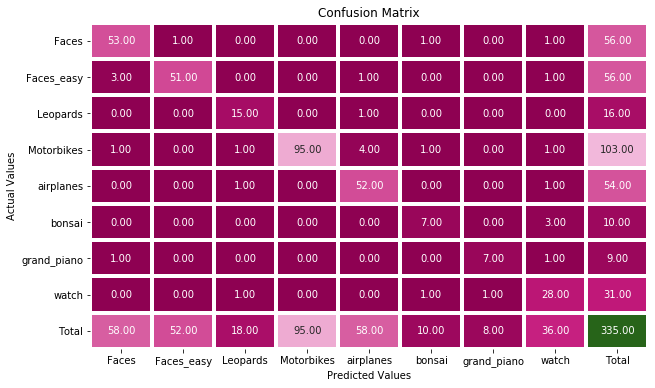

******************************Classifcation Report******************************


              precision    recall  f1-score   support

           0       0.91      0.95      0.93        56
           1       0.98      0.91      0.94        56
           2       0.83      0.94      0.88        16
           3       1.00      0.92      0.96       103
           4       0.90      0.96      0.93        54
           5       0.70      0.70      0.70        10
           6       0.88      0.78      0.82         9
           7       0.78      0.90      0.84        31

    accuracy                           0.92       335
   macro avg       0.87      0.88      0.88       335
weighted avg       0.92      0.92      0.92       335



In [43]:
classification_metric(y_pred,y_true,label=['Faces', 'Faces_easy', 'Leopards', 'Motorbikes', 'airplanes', 'bonsai','grand_piano', 'watch'])

# Importing Testing data

In [0]:
test=pd.read_csv('hackathon_images_test.csv')

In [0]:
test_reshape=test.iloc[:,1:].values.reshape(-1,100,100,1) # data reshape
test_reshape=test_reshape/255 # data normalization

In [0]:
test_values=conv_nn.predict_classes(test_reshape) # testing predictions

In [0]:
test_labels=le.transform(test['Labels']) 

# Confusion matrix for testing data

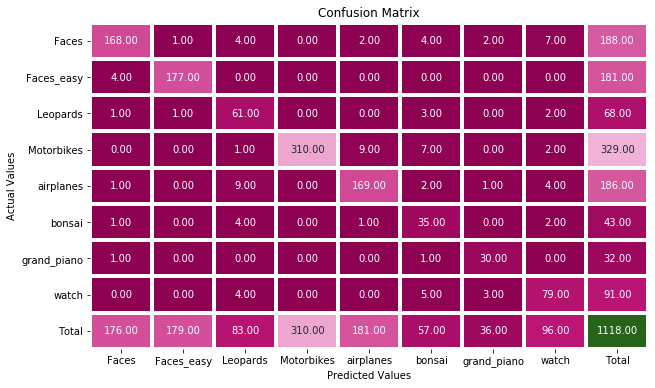

******************************Classifcation Report******************************


              precision    recall  f1-score   support

           0       0.95      0.89      0.92       188
           1       0.99      0.98      0.98       181
           2       0.73      0.90      0.81        68
           3       1.00      0.94      0.97       329
           4       0.93      0.91      0.92       186
           5       0.61      0.81      0.70        43
           6       0.83      0.94      0.88        32
           7       0.82      0.87      0.84        91

    accuracy                           0.92      1118
   macro avg       0.86      0.90      0.88      1118
weighted avg       0.93      0.92      0.92      1118



In [44]:
classification_metric(test_values,test_labels,label=['Faces', 'Faces_easy', 'Leopards', 'Motorbikes', 'airplanes', 'bonsai','grand_piano', 'watch'])

# Plotting testing images

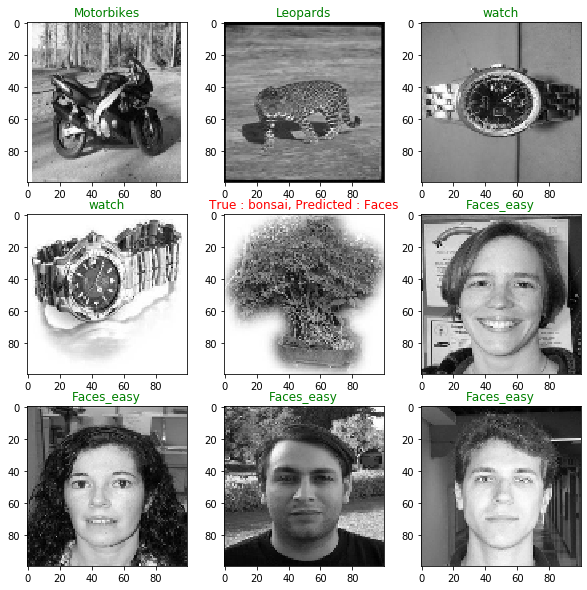

In [37]:
plt.figure(figsize=(10,10))
for num,i in enumerate(range(21,30)):
  #a=num+1
  plt.subplot(3,3,num+1)
  plt.imshow(test.iloc[i,1:].astype('float64').values.reshape(100,100),cmap='gray')
  if test_labels[i]==test_values[i]:
    plt.title(test['Labels'][i],color='green')
  else:
    plt.title('True : {}, Predicted : {}'.format(test['Labels'][i],le.classes_[test_values[i]]),color='red')
plt.show()